# Predicting return from Gold

In [1]:
#Importing Libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials 

In [2]:
ticker_details = pd.read_excel('Ticker List.xlsx')
ticker_details.head(20)

,Ticker,Description
0,GC=F,Gold
1,SI=F,Silver
2,CL=F,Crude Oil
3,^GSPC,S&P500
4,^RUT,Russel 2000 Index
5,ZN=F,10 Yr US T-Note futures
6,ZT=F,2 Yr US T-Note Futures
7,PL=F,Platinum
8,HG=F,Copper
9,DX=F,Dollar Index


In [3]:
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()
print(ticker)
print(names)

['GC=F', 'SI=F', 'CL=F', '^GSPC', '^RUT', 'ZN=F', 'ZT=F', 'PL=F', 'HG=F', 'DX=F', '^VIX', 'ZS=F', 'EEM', 'EURUSD=X', '^N100', '^IXIC']
['Gold', 'Silver', 'Crude Oil', 'S&P500', 'Russel 2000 Index', '10 Yr US T-Note futures', '2 Yr US T-Note Futures', 'Platinum', 'Copper', 'Dollar Index', 'Volatility Index', 'Soybean', 'MSCI EM ETF', 'Euro USD', 'Euronext100', 'Nasdaq']


In [4]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
end_date= '2020-03-01'
start_date = '2010-01-01'
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [5]:
print(values['Date'])

0      2010-01-01
1      2010-01-04
2      2010-01-05
3      2010-01-06
4      2010-01-07
          ...    
2646   2020-02-24
2647   2020-02-25
2648   2020-02-26
2649   2020-02-27
2650   2020-02-28
Name: Date, Length: 2651, dtype: datetime64[ns]


In [6]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date, 'daily')
    #print(raw_data)
    df = pd.DataFrame(raw_data[i]['prices'])[['formatted_date','adjclose']]
    #print(df)
    df.columns = ['Date1',i]
    df['Date1']= pd.to_datetime(df['Date1'])
    values = values.merge(df,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)


In [7]:
#Renaming columns to represent instrument names rather than their ticker codes for ease of readability
names.insert(0,'Date')
values.columns = names
print(values.shape)
print(values.isna().sum())
values.tail()

(2651, 17)
Date                         0
Gold                       117
Silver                     117
Crude Oil                  116
S&P500                      95
Russel 2000 Index           95
10 Yr US T-Note futures    118
2 Yr US T-Note Futures     116
Platinum                   123
Copper                     117
Dollar Index               118
Volatility Index            95
Soybean                    116
MSCI EM ETF                 95
Euro USD                   327
Euronext100                 56
Nasdaq                      95
dtype: int64


,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
2646,2020-02-24,1672.400024,18.868000,51.430000,3225.889893,1628.099976,132.656250,108.273438,971.700012,2.5925,99.283997,25.030001,874.25,41.005680,1.083905,1120.449951,9221.280273
2647,2020-02-25,1646.900024,18.183001,49.900002,3128.209961,1571.900024,133.125000,108.398438,929.799988,2.5965,98.901001,27.850000,879.00,40.680943,1.084920,1099.270020,8965.610352
2648,2020-02-26,1640.000000,17.826000,48.730000,3116.389893,1552.760010,133.328125,108.480469,912.299988,2.5765,98.938004,27.559999,881.00,41.005680,1.088200,1099.410034,8980.780273
2649,2020-02-27,1640.000000,17.658001,47.090000,2978.760010,1497.869995,133.437500,108.550781,903.599976,2.5715,98.460999,39.160000,886.25,40.021622,1.088589,1059.359985,8566.480469
2650,2020-02-28,1564.099976,16.386999,44.759998,2954.219971,1476.430054,134.843750,108.929688,862.799988,2.5460,98.081001,40.110001,883.50,39.874016,1.099723,1021.979980,8567.370117


In [8]:
#Front filling the NaN values in the data set
values = values.fillna(method="ffill",axis=0)
values = values.fillna(method="bfill",axis=0)
values.isna().sum()

Date                       0
Gold                       0
Silver                     0
Crude Oil                  0
S&P500                     0
Russel 2000 Index          0
10 Yr US T-Note futures    0
2 Yr US T-Note Futures     0
Platinum                   0
Copper                     0
Dollar Index               0
Volatility Index           0
Soybean                    0
MSCI EM ETF                0
Euro USD                   0
Euronext100                0
Nasdaq                     0
dtype: int64

บังคับให้ค่าในคอลัมน์เป็นตัวเลขทั้งหมด ยกเว้นDate

In [9]:
# Co-ercing numeric type to all columns except Date
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)
values.tail()

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
2646,2020-02-24,1672.4,18.9,51.4,3225.9,1628.1,132.7,108.3,971.7,2.6,99.3,25.0,874.2,41.0,1.1,1120.4,9221.3
2647,2020-02-25,1646.9,18.2,49.9,3128.2,1571.9,133.1,108.4,929.8,2.6,98.9,27.9,879.0,40.7,1.1,1099.3,8965.6
2648,2020-02-26,1640.0,17.8,48.7,3116.4,1552.8,133.3,108.5,912.3,2.6,98.9,27.6,881.0,41.0,1.1,1099.4,8980.8
2649,2020-02-27,1640.0,17.7,47.1,2978.8,1497.9,133.4,108.6,903.6,2.6,98.5,39.2,886.2,40.0,1.1,1059.4,8566.5
2650,2020-02-28,1564.1,16.4,44.8,2954.2,1476.4,134.8,108.9,862.8,2.5,98.1,40.1,883.5,39.9,1.1,1022.0,8567.4


save ข้อมูลลงใน Training Data_Values.csv

In [10]:
values.to_csv("Training Data_Values.csv")

ในแนวทางข้างต้นเราเน้นว่าเราจะใช้ผลตอบแทนที่ล้าหลังของตราสารในรายการเพื่อทำนายผลตอบแทนของทองคำในอนาคต ที่นี่เราจะคำนวณผลตอบแทนในอดีตระยะสั้นของตราสารทั้งหมดและผลตอบแทนในอดีตระยะยาวของตราสารที่เลือกเพียงไม่กี่รายการ

แนวคิดพื้นฐานที่อยู่เบื้องหลังคือว่าหากสินทรัพย์บางรายการมีประสิทธิภาพสูงหรือต่ำกว่าประสิทธิภาพสูงมีโอกาสที่พอร์ตการลงทุนจะปรับสมดุลได้มากขึ้นซึ่งจะส่งผลกระทบต่อผลตอบแทนในสินทรัพย์ประเภทอื่น ๆ ในอนาคต เช่น: หากตลาดหุ้น (เช่น S & P500) แสดงผลตอบแทนที่น่าทึ่งในช่วง 6 เดือนที่ผ่านมาผู้จัดการสินทรัพย์อาจต้องการทำกำไรและจัดสรรเงินบางส่วนเพื่อบอกโลหะมีค่าและเตรียมพร้อมสำหรับการปรับฐานของตลาดหุ้น แผนภูมิด้านล่างแสดงให้เห็นว่าการเคลื่อนไหวของราคาและความสัมพันธ์ระหว่างทองคำและ S & P500 ในสภาวะตลาดที่แตกต่างกันอย่างไร อย่างไรก็ตามเราจะใช้ Machine Learning เพื่อประเมินสมมติฐาน

In [11]:
imp = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF']
# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
    print(data.shape)
    x= values[cols].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]
print(data.shape)
print()
# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
    print(data.shape)
    x= values[imp].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]
print(data.shape)

(2651, 1)
(2651, 17)
(2651, 33)
(2651, 49)
(2651, 65)
(2651, 81)

(2651, 81)
(2651, 86)
(2651, 91)
(2651, 96)
(2651, 101)


นอกจากผลตอบแทนที่ล้าหลังแล้วเรายังดูว่าราคาทองคำในปัจจุบันอยู่ห่างจากค่าเฉลี่ยเคลื่อนที่สำหรับหน้าต่างที่แตกต่างกันเพียงใด นี่คือเมตริกที่ใช้กันมากในการวิเคราะห์ทางเทคนิคโดยที่ค่าเฉลี่ยเคลื่อนที่เสนอการสนับสนุนและความต้านทานสำหรับราคาสินทรัพย์ เราใช้การผสมผสานระหว่างค่าเฉลี่ยเคลื่อนที่อย่างง่ายและเลขชี้กำลัง จากนั้นเราจะเพิ่มค่าเฉลี่ยเคลื่อนที่เหล่านี้ลงในพื้นที่คุณลักษณะที่มีอยู่

การคำนวณค่า Movig average

In [12]:
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
moving_avg['Gold/90EMA'] = (values['Gold']/(values['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/180EMA'] = (values['Gold']/(values['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)
print(moving_avg.shape)
moving_avg.head()

(2472, 8)


,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/90EMA,Gold/180EMA
179,2010-09-09,0.005005,0.020246,0.026862,0.026428,0.067496,0.032506,0.046162
180,2010-09-10,0.000536,0.014916,0.023422,0.022489,0.063095,0.028204,0.041912
181,2010-09-13,0.000043,0.013705,0.023840,0.022565,0.062965,0.028040,0.041852
182,2010-09-14,0.017736,0.031368,0.043642,0.042295,0.083187,0.047219,0.061593
183,2010-09-15,0.013857,0.026901,0.040711,0.039604,0.079958,0.043701,0.058291


การรวมค่า Moving Average เข้ากับ feature space

In [13]:
#Merging Moving Average values to the feature space
print(data.shape)
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
print(data.shape)
data.isna().sum()

(2651, 101)
(2651, 108)


Date               0
Gold-T-1           1
Silver-T-1         1
Crude Oil-T-1      1
S&P500-T-1         1
                ... 
Gold/60SMA       179
Gold/90SMA       179
Gold/180SMA      179
Gold/90EMA       179
Gold/180EMA      179
Length: 108, dtype: int64

การคำนวณผลตอบแทนล่วงหน้าสำหรับเป้าหมาย

In [14]:
#Caluculating forward returns for Target
y = pd.DataFrame(data=values['Date'])
print(y.shape)
y['Gold-T+1']=values["Gold"].pct_change(periods=-1)
print(y.shape)
y.isna().sum()

(2651, 1)
(2651, 2)


Date        0
Gold-T+1    1
dtype: int64

การลบ NAs(Missing value)

In [15]:
# Removing NAs
data = data[data['Gold-T-250'].notna()]
y = y[y['Gold-T+1'].notna()]
#เช็คจำนวน Gold-T-250วัน ว่าไม่มีข้อมูลที่เป็นNAsเท่าไหร่
print(data.shape)
print(y.shape)

(2401, 108)
(2650, 2)


ตอนนี้เราจะรวมตัวแปร Target เข้ากับ feature space เพื่อรับข้อมูลที่เราสามารถเริ่มสร้างแบบจำลองได้ในที่สุด

การเพิ่มตัวแปรเป้าหมาย

In [16]:
#Adding Target Variables
data = pd.merge(left=data,right=y,how='inner',on='Date',suffixes=(False,False))
print(data.shape)
data.isna().sum()

(2400, 109)


Date             0
Gold-T-1         0
Silver-T-1       0
Crude Oil-T-1    0
S&P500-T-1       0
                ..
Gold/90SMA       0
Gold/180SMA      0
Gold/90EMA       0
Gold/180EMA      0
Gold-T+1         0
Length: 109, dtype: int64

save เป็น Training Data.csv

In [17]:
data.to_csv("Training Data.csv",index=False)

In [18]:
corr = data.corr().iloc[:,-1:]

In [19]:
corr

,Gold-T+1
Gold-T-1,0.033877
Silver-T-1,0.005491
Crude Oil-T-1,-0.023864
S&P500-T-1,-0.033171
Russel 2000 Index-T-1,-0.014027
...,...
Gold/90SMA,0.019970
Gold/180SMA,0.011778
Gold/90EMA,0.018017
Gold/180EMA,0.014159


In [20]:
import seaborn as sns
import numpy as np

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gold-T+1', ylabel='Density'>

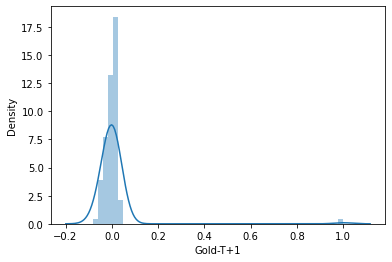

In [21]:
sns.distplot(corr.iloc[:,0])

In [22]:
pd.set_option('display.max_rows', None)
corr_data = data.tail(2000).corr()
corr_data = pd.DataFrame(corr_data['Gold-T+1'])
#corr_data = corr_data.iloc[3:,]
corr_data = corr_data.sort_values('Gold-T+1',ascending=False)
#corr_data

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

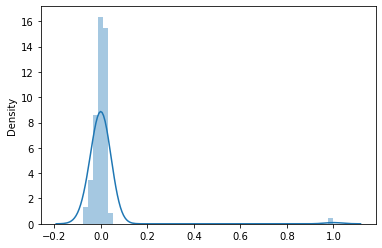

In [23]:
sns.distplot(corr_data)

# Regression

## 1 Day Model

In [24]:
#data = pd.read_csv("Training Data.csv")

In [25]:
from pycaret.regression import *

In [26]:
data_1 = data

In [27]:
a=setup(data_1,target='Gold-T+1',
        ignore_features=['Date'],session_id=11,
        silent=True,profile=False,remove_outliers=False);
        #transformation=True,
        #pca=True,pca_method='kernel',
        #pca_components=10,
        #create_clusters=True,
        #cluster_iter=10,
        #feature_ratio=True,
        #normalize=True,
        #transform_target=True,
       #silent=True);

 
Setup Succesfully Completed.


,Description,Value
0,session_id,11
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2400, 109)"
4,Missing Values,False
5,Numeric Features,107
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [28]:
tr = create_model('tr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0066,0.0001,0.0088,-0.1799,0.0066,-0.6265
1,0.0068,0.0001,0.0095,-0.1082,0.0076,0.1980
2,0.0074,0.0001,0.0111,-0.0443,0.0094,0.2893
3,0.0073,0.0001,0.0102,-0.1379,0.0084,-0.0387
4,0.0072,0.0001,0.0102,-0.1909,0.0080,0.1852
5,0.0074,0.0001,0.0105,-0.0290,0.0084,0.2364
6,0.0073,0.0001,0.0112,-0.2588,0.0086,0.2991
7,0.0072,0.0001,0.0100,0.0298,0.0085,0.2527
8,0.0078,0.0001,0.0104,-0.0102,0.0089,0.4064
9,0.0072,0.0001,0.0103,-0.1864,0.0076,-0.4062


In [29]:
ard = create_model('ard')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0065,0.0001,0.0085,-0.0980,0.0072,-0.4475
1,0.0066,0.0001,0.0092,-0.0477,0.0080,0.2853
2,0.0070,0.0001,0.0109,-0.0014,0.0098,0.2036
3,0.0067,0.0001,0.0096,-0.0031,0.0088,-0.1335
4,0.0069,0.0001,0.0097,-0.0869,0.0085,0.1181
5,0.0069,0.0001,0.0103,0.0107,0.0095,0.1176
6,0.0066,0.0001,0.0102,-0.0395,0.0092,0.0416
7,0.0072,0.0001,0.0100,0.0296,0.0091,0.0473
8,0.0074,0.0001,0.0102,0.0326,0.0095,0.1271
9,0.0067,0.0001,0.0093,0.0219,0.0083,-0.1374


In [30]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0071,0.0001,0.0092,-0.2828,0.0064,-0.6163
1,0.0075,0.0001,0.0102,-0.2717,0.0072,-0.0761
2,0.0080,0.0001,0.0122,-0.2529,0.0090,0.6142
3,0.0073,0.0001,0.0108,-0.2686,0.0078,-0.4370
4,0.0072,0.0001,0.0098,-0.1099,0.0078,-0.1686
5,0.0080,0.0001,0.0113,-0.2074,0.0089,0.2043
6,0.0074,0.0001,0.0101,-0.0218,0.0081,0.1753
7,0.0080,0.0001,0.0114,-0.2392,0.0086,0.2054
8,0.0079,0.0001,0.0111,-0.1329,0.0084,0.1853
9,0.0072,0.0001,0.0097,-0.0629,0.0075,-0.2508


In [31]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0069,0.0001,0.0092,-0.2824,0.0071,-0.3945
1,0.0068,0.0001,0.0095,-0.1075,0.0080,0.1061
2,0.0071,0.0001,0.0108,0.0103,0.0098,0.2531
3,0.0067,0.0001,0.0098,-0.0604,0.0085,-0.3299
4,0.0068,0.0001,0.0095,-0.0379,0.0086,0.0081
5,0.0073,0.0001,0.0107,-0.0729,0.0092,0.1854
6,0.0067,0.0001,0.0100,-0.0052,0.0088,0.1167
7,0.0074,0.0001,0.0107,-0.0975,0.0088,0.1910
8,0.0074,0.0001,0.0103,0.0230,0.0094,0.0250
9,0.0070,0.0001,0.0096,-0.0415,0.0084,-0.2764


In [32]:
#compare_models(blacklist=['tr','ard'],turbo=True)
compare_models(['tr','ard'],turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Passive Aggressive Regressor,0.0067,0.0001,0.0098,-0.0109,0.0097,0.0032,0.0307
1,Lasso Regression,0.0067,0.0001,0.0098,-0.0133,0.0096,-0.0680,0.0295
2,Elastic Net,0.0067,0.0001,0.0098,-0.0133,0.0096,-0.0680,0.0121
3,Lasso Least Angle Regression,0.0067,0.0001,0.0098,-0.0133,0.0096,-0.0680,0.0114
4,Bayesian Ridge,0.0067,0.0001,0.0098,-0.0163,0.0095,-0.0555,0.0613
5,Ridge Regression,0.0068,0.0001,0.0099,-0.0348,0.0090,-0.0206,0.0249
6,Orthogonal Matching Pursuit,0.0069,0.0001,0.0099,-0.0363,0.0087,-0.0126,0.0139
7,Huber Regressor,0.0069,0.0001,0.0099,-0.0429,0.0086,0.0295,0.3064
8,AdaBoost Regressor,0.0071,0.0001,0.0100,-0.0630,0.0087,-0.1835,1.5724
9,Extra Trees Regressor,0.0070,0.0001,0.0100,-0.0672,0.0087,-0.0115,2.7868


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=11, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

tune_model() คือการนำโมเดลมาปรับค่าไฮเปอร์พารามิเตอร์เพื่อให้ได้ผลลัพธ์ที่ดียิ่งขึ้น

In [33]:
#knn_tuned = tune_model('knn',n_iter=150)
knn_tuned = tune_model(knn,n_iter=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0063,0.0001,0.0083,-0.0424,0.0073,-0.3840
1,0.0065,0.0001,0.0091,-0.0123,0.0082,-0.1440
2,0.0071,0.0001,0.0108,0.0075,0.0100,-0.2743
3,0.0070,0.0001,0.0100,-0.0944,0.0087,-0.2873
4,0.0066,0.0001,0.0094,-0.0215,0.0084,0.0262
5,0.0072,0.0001,0.0106,-0.0548,0.0095,-0.0720
6,0.0068,0.0001,0.0103,-0.0610,0.0091,0.1360
7,0.0075,0.0001,0.0105,-0.0675,0.0093,-0.0162
8,0.0076,0.0001,0.0104,-0.0088,0.0095,0.1595
9,0.0070,0.0001,0.0097,-0.0551,0.0086,-0.6246


In [34]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0071,0.0001,0.0092,-0.2935,0.0067,-0.5278
1,0.0068,0.0001,0.0097,-0.1525,0.0076,-0.0409
2,0.0075,0.0001,0.0112,-0.0591,0.0097,0.4919
3,0.0069,0.0001,0.0098,-0.0562,0.0085,-0.4130
4,0.0070,0.0001,0.0097,-0.0818,0.0082,-0.3818
5,0.0072,0.0001,0.0104,-0.0098,0.0091,0.3478
6,0.0071,0.0001,0.0104,-0.0821,0.0088,0.0532
7,0.0075,0.0001,0.0107,-0.0939,0.0087,0.1339
8,0.0073,0.0001,0.0102,0.0400,0.0091,0.1423
9,0.0072,0.0001,0.0100,-0.1302,0.0081,-0.5349


In [35]:
catb_tuned = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0061,0.0001,0.0082,-0.0244,0.0079,-0.3088
1,0.0063,0.0001,0.0090,-0.0004,0.0088,-0.0716
2,0.0071,0.0001,0.0109,-0.0012,0.0106,-0.1427
3,0.0067,0.0001,0.0096,-0.0196,0.0093,-0.2379
4,0.0065,0.0001,0.0094,-0.0224,0.0093,0.0917
5,0.0069,0.0001,0.0105,-0.0272,0.0103,0.1958
6,0.0064,0.0001,0.0101,-0.0087,0.0099,0.0602
7,0.0072,0.0001,0.0103,-0.0193,0.0099,-0.1604
8,0.0073,0.0001,0.0104,-0.0003,0.0102,-0.0263
9,0.0066,0.0001,0.0095,-0.0088,0.0093,-0.0499


In [36]:
et_tuned = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0061,0.0001,0.0082,-0.0218,0.0078,-0.2837
1,0.0063,0.0001,0.0091,-0.0142,0.0086,0.0343
2,0.0070,0.0001,0.0109,-0.0061,0.0104,0.0052
3,0.0066,0.0001,0.0096,-0.0190,0.0092,-0.1525
4,0.0066,0.0001,0.0095,-0.0376,0.0091,0.1515
5,0.0069,0.0001,0.0105,-0.0266,0.0100,0.2764
6,0.0065,0.0001,0.0100,-0.0063,0.0096,0.1566
7,0.0071,0.0001,0.0102,-0.0070,0.0098,-0.0087
8,0.0073,0.0001,0.0104,0.0014,0.0100,0.0611
9,0.0067,0.0001,0.0095,-0.0172,0.0090,-0.0778


In [37]:
evaluate_model(knn_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
evaluate_model(et_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

bจะลบค่าผิดปกติ remove_outliers=True (a ไม่ได้ลบ)

In [39]:
b=setup(data_1,target='Gold-T+1',
        ignore_features=['Date'],session_id=11,
        silent=True,profile=False,remove_outliers=True);
        #transformation=True,
        #pca=True,pca_method='kernel',
        #pca_components=10,
        #create_clusters=True,
        #cluster_iter=10,
        #feature_ratio=True,
        #normalize=True,
        #transform_target=True,
       #silent=True);

 
Setup Succesfully Completed.


,Description,Value
0,session_id,11
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2400, 109)"
4,Missing Values,False
5,Numeric Features,107
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [40]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0074,0.0001,0.0102,-0.1720,0.0080,0.1430
1,0.0066,0.0001,0.0088,-0.2332,0.0065,-1.2284
2,0.0078,0.0001,0.0107,-0.1739,0.0079,-0.2236
3,0.0071,0.0001,0.0097,-0.3536,0.0068,-0.2775
4,0.0072,0.0001,0.0097,-0.1406,0.0074,0.3176
5,0.0081,0.0001,0.0117,-0.1575,0.0096,0.2367
6,0.0073,0.0001,0.0101,-0.1731,0.0074,-0.3608
7,0.0073,0.0001,0.0119,-0.0652,0.0101,-0.5776
8,0.0073,0.0001,0.0098,-0.1320,0.0078,-0.5950
9,0.0079,0.0001,0.0109,-0.2465,0.0083,0.3878


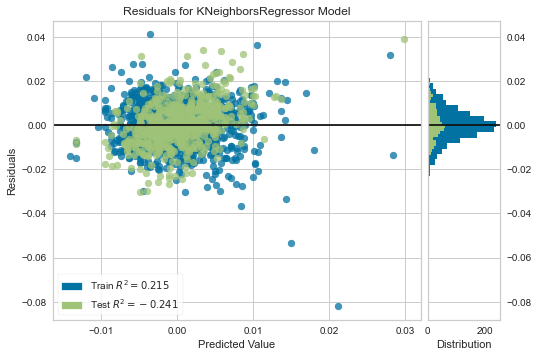

In [41]:
plot_model(knn)

In [42]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
knn_tuned = tune_model(knn,n_iter=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0068,0.0001,0.0097,-0.0493,0.0087,0.0485
1,0.0059,0.0001,0.0079,-0.0056,0.0073,-0.5773
2,0.0072,0.0001,0.0100,-0.0297,0.0091,-0.1330
3,0.0062,0.0001,0.0085,-0.0554,0.0074,-0.0913
4,0.0066,0.0001,0.0092,-0.0161,0.0084,-0.1377
5,0.0072,0.0001,0.0110,-0.0301,0.0101,-0.0213
6,0.0066,0.0001,0.0094,-0.0270,0.0085,-0.0663
7,0.0068,0.0001,0.0117,-0.0282,0.0108,-0.2530
8,0.0065,0.0001,0.0094,-0.0349,0.0084,-0.1632
9,0.0071,0.0001,0.0101,-0.0689,0.0093,0.0632


In [44]:
#plot_model(knn_tuned)

In [45]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0067,0.0001,0.0096,-0.0190,0.0083,0.0050
1,0.0061,0.0001,0.0084,-0.1152,0.0069,-0.5003
2,0.0075,0.0001,0.0104,-0.1250,0.0088,-0.0903
3,0.0063,0.0001,0.0084,-0.0233,0.0073,-0.0894
4,0.0067,0.0001,0.0092,-0.0162,0.0080,0.3292
5,0.0076,0.0001,0.0113,-0.0831,0.0099,0.0775
6,0.0069,0.0001,0.0097,-0.0857,0.0085,-0.2181
7,0.0072,0.0001,0.0121,-0.0945,0.0106,-0.4134
8,0.0069,0.0001,0.0097,-0.1128,0.0083,-0.7076
9,0.0072,0.0001,0.0100,-0.0494,0.0088,0.2364


In [46]:
#plot_model(et)

In [47]:
catb = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0069,0.0001,0.0097,-0.0462,0.0084,0.3116
1,0.0062,0.0001,0.0083,-0.0929,0.0067,-0.6683
2,0.0071,0.0001,0.0098,0.0092,0.0085,-0.2358
3,0.0062,0.0001,0.0085,-0.0350,0.0071,-0.1500
4,0.0069,0.0001,0.0093,-0.0456,0.0077,0.4685
5,0.0074,0.0001,0.0110,-0.0188,0.0096,0.1606
6,0.0071,0.0001,0.0098,-0.1071,0.0083,-0.4678
7,0.0072,0.0002,0.0124,-0.1528,0.0100,-0.7004
8,0.0070,0.0001,0.0098,-0.1294,0.0081,-0.4481
9,0.0072,0.0001,0.0099,-0.0326,0.0086,0.3651


### Ensembling Models

Ensemble Method คือหนึ่งในเทคนิคของ Machine learning ที่นำ Model หลายๆ Model มารวมกันเพื่อที่จะทำให้ผลลัพธ์ออกมาดีที่สุด 
ref.
https://medium.com/botnoi-classroom/botnoi-classroom-มาทำให้ผลลัพธ์ดีขึ้นด้วย-ensemble-method-กันเถอะ-b5ac9acfa8d3


method='Bagging'  -> Bagging (bootstrap aggregation) คือการสุ่มข้อมูลมาจากข้อมูลประชากร เพื่อใช้คำนวณค่าทางสถิติของประชากรกลุ่มเล็กๆที่เราสุ่มออกมา หรือ การสุ่มตัวอย่างข้อมูลออกมาแล้วสร้าง classifier ขึ้นมา สำหรับวิธีการสุ่มข้อมูลออกมา เราใช้วิธีสุ่มแบบแทนที่ (random with replacement) ซึ่งหมายความว่าข้อมูลที่เรามียังอยู่เหมือนเดิม ไม่ได้ลดลงหลังจากการสุ่ม 

ref. 
https://tupleblog.github.io/bagging-boosting/
https://medium.com/cw-quantlab/ensemble-learning-method-98359636adf9

In [48]:
et_bagged = ensemble_model(et,method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0067,0.0001,0.0095,-0.0096,0.0087,-0.0532
1,0.0060,0.0001,0.0082,-0.0651,0.0072,-0.3081
2,0.0073,0.0001,0.0102,-0.0725,0.0090,-0.2327
3,0.0061,0.0001,0.0084,-0.0127,0.0076,-0.1056
4,0.0067,0.0001,0.0093,-0.0511,0.0082,0.2037
5,0.0074,0.0001,0.0112,-0.0510,0.0101,0.0010
6,0.0067,0.0001,0.0095,-0.0449,0.0085,-0.1582
7,0.0071,0.0001,0.0120,-0.0744,0.0107,-0.5499
8,0.0066,0.0001,0.0094,-0.0340,0.0084,-0.4182
9,0.0071,0.0001,0.0100,-0.0506,0.0091,0.0896


In [49]:
knn_tuned_bagged = ensemble_model(knn_tuned, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0067,0.0001,0.0096,-0.0387,0.0088,0.0382
1,0.0060,0.0001,0.0079,-0.0061,0.0072,-0.4562
2,0.0072,0.0001,0.0100,-0.0375,0.0091,-0.1422
3,0.0062,0.0001,0.0086,-0.0712,0.0075,-0.0821
4,0.0066,0.0001,0.0092,-0.0248,0.0084,-0.0943
5,0.0072,0.0001,0.0110,-0.0271,0.0102,0.0523
6,0.0066,0.0001,0.0095,-0.0326,0.0085,-0.1227
7,0.0068,0.0001,0.0117,-0.0293,0.0108,-0.3148
8,0.0065,0.0001,0.0093,-0.0246,0.0084,-0.1728
9,0.0070,0.0001,0.0101,-0.0619,0.0093,0.1494


In [50]:
#plot_model(knn_tuned_bagged)

In [51]:
evaluate_model(knn_tuned_bagged)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Blending Models

blend_models() แนวคิดคือการรวมMLที่แตกต่างกันและใช้การโหวตเสียงข้างมาก(majority vote)หรือความน่าจะเป็นโดยเฉลี่ยที่คาดการณ์ไว้ในกรณีของการจำแนกประเภทเพื่อทำนายผลลัพธ์สุดท้าย
ref.
https://pycaret.org/blend-models/

In [52]:
blend_knn_et = blend_models(estimator_list=[knn_tuned,et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0067,0.0001,0.0096,-0.0191,0.0086,-0.1032
1,0.0060,0.0001,0.0080,-0.0295,0.0073,-0.4996
2,0.0072,0.0001,0.0101,-0.0454,0.0090,-0.0648
3,0.0061,0.0001,0.0084,-0.0161,0.0075,-0.0718
4,0.0066,0.0001,0.0091,0.0016,0.0083,0.0124
5,0.0073,0.0001,0.0111,-0.0384,0.0101,-0.0143
6,0.0067,0.0001,0.0095,-0.0355,0.0086,-0.1773
7,0.0070,0.0001,0.0118,-0.0516,0.0108,-0.3217
8,0.0066,0.0001,0.0095,-0.0517,0.0084,-0.4615
9,0.0071,0.0001,0.0100,-0.0471,0.0091,0.1142


In [53]:
#plot_model(blend_knn_et)

In [54]:
evaluate_model(blend_knn_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

WARNING : create_stacknet function will be deprecated in future release of PyCaret 2.x.

In [55]:
stack1 = create_stacknet(estimator_list=[[catb,knn_tuned],[et,blend_knn_et]],restack=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0073,0.0001,0.0100,-0.1174,0.0080,0.4951
1,0.0065,0.0001,0.0083,-0.1101,0.0067,-0.7678
2,0.0075,0.0001,0.0101,-0.0488,0.0084,-0.4103
3,0.0064,0.0001,0.0085,-0.0462,0.0068,-0.4247
4,0.0064,0.0001,0.0091,0.0005,0.0077,0.3991
5,0.0075,0.0001,0.0109,-0.0056,0.0094,-0.1491
6,0.0069,0.0001,0.0095,-0.0378,0.0080,0.2318
7,0.0078,0.0002,0.0130,-0.2696,0.0096,-1.3740
8,0.0067,0.0001,0.0095,-0.0508,0.0078,-0.3027
9,0.0069,0.0001,0.0097,0.0071,0.0085,0.1029


In [56]:
stack2 = create_stacknet(estimator_list=[[catb,et,knn_tuned],[blend_knn_et]], restack=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0073,0.0001,0.0100,-0.1223,0.0080,0.4677
1,0.0065,0.0001,0.0083,-0.0988,0.0067,-0.7838
2,0.0075,0.0001,0.0101,-0.0525,0.0085,-0.2919
3,0.0064,0.0001,0.0085,-0.0503,0.0069,-0.4025
4,0.0064,0.0001,0.0091,-0.0019,0.0077,0.3157
5,0.0076,0.0001,0.0109,-0.0072,0.0094,-0.0830
6,0.0069,0.0001,0.0095,-0.0460,0.0080,0.2806
7,0.0078,0.0002,0.0130,-0.2748,0.0096,-1.4007
8,0.0066,0.0001,0.0094,-0.0291,0.0079,-0.2707
9,0.0069,0.0001,0.0097,0.0063,0.0085,0.0669


In [57]:
stack3 = create_stacknet(estimator_list=[[catb,et,knn_tuned],[blend_knn_et]], restack=True,meta_model=blend_knn_et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0067,0.0001,0.0095,-0.0182,0.0088,-0.1518
1,0.0060,0.0001,0.0081,-0.0419,0.0073,-0.5092
2,0.0073,0.0001,0.0101,-0.0608,0.0091,-0.1918
3,0.0060,0.0001,0.0084,-0.0172,0.0075,-0.0807
4,0.0065,0.0001,0.0091,-0.0013,0.0084,-0.0817
5,0.0074,0.0001,0.0112,-0.0624,0.0102,0.0080
6,0.0066,0.0001,0.0094,-0.0255,0.0085,-0.1508
7,0.0069,0.0001,0.0118,-0.0506,0.0108,-0.4402
8,0.0066,0.0001,0.0094,-0.0347,0.0085,-0.3863
9,0.0070,0.0001,0.0100,-0.0427,0.0092,0.0813


In [58]:
save_model(model=stack3, model_name='1Day Regressor')

Transformation Pipeline and Model Succesfully Saved
